In [1]:
import scipy.io
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential

from sklearn.model_selection import train_test_split

from keras import metrics

from keras.models import model_from_json
import matplotlib.pyplot as plt

In [3]:
#https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/
# mat = scipy.io.loadmat('wiki_crop/wiki.mat')

In [ ]:
# columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]

In [ ]:
# instances = mat['wiki'][0][0][0].shape[1]

# df = pd.DataFrame(index = range(0,instances), columns = columns)

In [ ]:
# for i in mat:
#     if i == "wiki":
#         current_array = mat[i][0][0]
#         for j in range(len(current_array)):
#             #print(columns[j],": ",current_array[j])
#             df[columns[j]] = pd.DataFrame(current_array[j][0])

In [ ]:
# df.head()

In [ ]:
# #remove pictures does not include face
# df = df[df['face_score'] != -np.inf]

# #some pictures include more than one face, remove them
# df = df[df['second_face_score'].isna()]

# #check threshold
# df = df[df['face_score'] >= 3]

# #some records do not have a gender information
# df = df[~df['gender'].isna()]

In [ ]:
# df = df.drop(columns = ['dob','photo_taken','name','face_score','second_face_score','face_location'])

In [ ]:
# df.head()

In [ ]:
# histogram = df['gender'].hist(bins=df['gender'].nunique())

In [ ]:
# df['gender'].value_counts().sort_index()
# #0: woman, 1: man

In [8]:
 classes = 2 #man woman
# print("number of output classes: ",classes)

In [ ]:
# target_size = (224, 224)

# def getImagePixels(image_path):
#     img = image.load_img("wiki_crop/%s" % image_path[0], grayscale=False, target_size=target_size)
#     x = image.img_to_array(img).reshape(1, -1)[0]
#     #x = preprocess_input(x)
#     return x

In [ ]:
# df['pixels'] = df['full_path'].apply(getImagePixels)

In [ ]:
# df.head()

In [ ]:
# target = df['gender'].values
# target_classes = keras.utils.to_categorical(target, classes)

In [ ]:
# #features = df['pixels'].values
# features = []

# for i in range(0, df.shape[0]):
#     features.append(df['pixels'].values[i])

# features = np.array(features)
# features = features.reshape(features.shape[0], 224, 224, 3)

In [ ]:
# features.shape

In [ ]:
# features /= 255 #normalize in [0, 1]

In [ ]:
# train_x, test_x, train_y, test_y = train_test_split(features, target_classes, test_size=0.30)

In [4]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#pre-trained weights of vgg-face model. 
#you can find it here: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#related blog post: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
model.load_weights('/content/drive/My Drive/vgg_face_weights.h5')

In [9]:
#freeze all layers of VGG-Face except last 7 one
for layer in model.layers[:-7]:
    layer.trainable = False

base_model_output = Sequential()
base_model_output = Convolution2D(classes, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)

gender_model = Model(inputs=model.input, outputs=base_model_output)

In [10]:
#check trainable layers
if False:
    for layer in model.layers:
        print(layer, layer.trainable)
    
    print("------------------------")
    for layer in age_model.layers:
        print(layer, layer.trainable)

In [11]:
sgd = keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

gender_model.compile(loss='categorical_crossentropy'
                  , optimizer=keras.optimizers.Adam()
                  #, optimizer = sgd
                  , metrics=['accuracy']
                 )

In [24]:
checkpointer = ModelCheckpoint(
    filepath='/content/drive/My Drive/classification_gender_model.hdf5'
    , monitor = "val_loss"
    , verbose=1
    , save_best_only=True
    , mode = 'auto'
)

In [25]:
scores = []

In [26]:
enableFit = False

if enableFit:
    epochs = 250
    batch_size = 256

    for i in range(epochs):
        print("epoch ",i)
        
        ix_train = np.random.choice(train_x.shape[0], size=batch_size)
        
        score = gender_model.fit(
            train_x[ix_train], train_y[ix_train]
            , epochs=1
            , validation_data=(test_x, test_y)
            , callbacks=[checkpointer]
        )
        
        scores.append(score)
        
        from keras.models import load_model
        gender_model = load_model("classification_gender_model.hdf5")
        
        gender_model.save_weights('gender_model_weights.h5')
        
else:
    #pre-trained weights for gender prediction: https://drive.google.com/file/d/1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk/view?usp=sharing
    gender_model.load_weights("/content/drive/My Drive/gender_model_weights.h5")

In [16]:
# val_loss_change = []; loss_change = []
# for i in range(0, len(scores)):
#     val_loss_change.append(scores[i].history['val_loss'])
#     loss_change.append(scores[i].history['loss'])

# plt.plot(val_loss_change, label='val_loss')
# plt.plot(loss_change, label='train_loss')
# plt.legend(loc='upper right')
# plt.show()

# Testing model on the testing set

In [27]:
#loss and accuracy on validation set
gender_model.evaluate(test_x, test_y, verbose=1)

NameError: ignored

In [28]:
predictions = gender_model.predict(test_x)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

pred_list = []; actual_list = []

for i in predictions:
    pred_list.append(np.argmax(i))

for i in test_y: 
    actual_list.append(np.argmax(i))

confusion_matrix(actual_list, pred_list)

# Testing model

Feed an image to find the gender

In [29]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [30]:
def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

In [39]:
picture = "/content/WhatsApp Image 2021-05-10 at 9.10.58 PM.jpeg"

prediction = gender_model.predict(loadImage(picture))

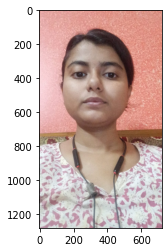

gender:  Man


In [40]:
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()

gender = "Man" if np.argmax(prediction) == 1 else "Woman"

print("gender: ", gender)